<a href="https://colab.research.google.com/github/ashish244co/SHALA2020/blob/master/Ashish_Kashav_Assignmen1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
attrition_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    719
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1028
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                966
MonthlyRate                 1011
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                35
YearsInCur

In [5]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1028 non-null   int64 
 1   Attrition                 1028 non-null   int64 
 2   BusinessTravel            1028 non-null   object
 3   DailyRate                 1028 non-null   int64 
 4   Department                1028 non-null   object
 5   DistanceFromHome          1028 non-null   int64 
 6   Education                 1028 non-null   int64 
 7   EducationField            1028 non-null   object
 8   EmployeeCount             1028 non-null   int64 
 9   EmployeeNumber            1028 non-null   int64 
 10  EnvironmentSatisfaction   1028 non-null   int64 
 11  Gender                    1028 non-null   object
 12  HourlyRate                1028 non-null   int64 
 13  JobInvolvement            1028 non-null   int64 
 14  JobLevel                

Text(0, 0.5, 'Frequency')

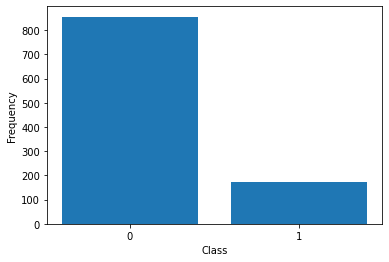

In [6]:
plt.bar(attrition_data['Attrition'].value_counts().index,attrition_data['Attrition'].value_counts())
plt.xticks(attrition_data['Attrition'].value_counts().index)
plt.xlabel('Class')
plt.ylabel('Frequency')

As we can see its a highly imbalanced dataset with many negative examples.

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve  ,roc_auc_score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe01fd46048>,
      dtype=object)

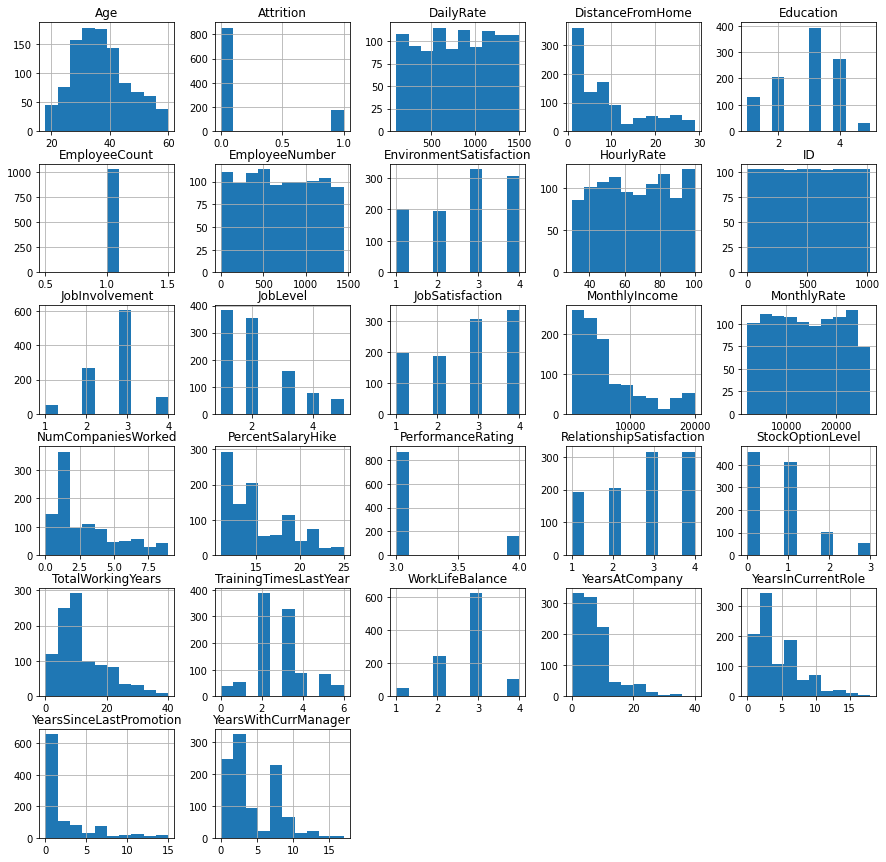

In [8]:
attrition_data.hist(figsize=(15,15))

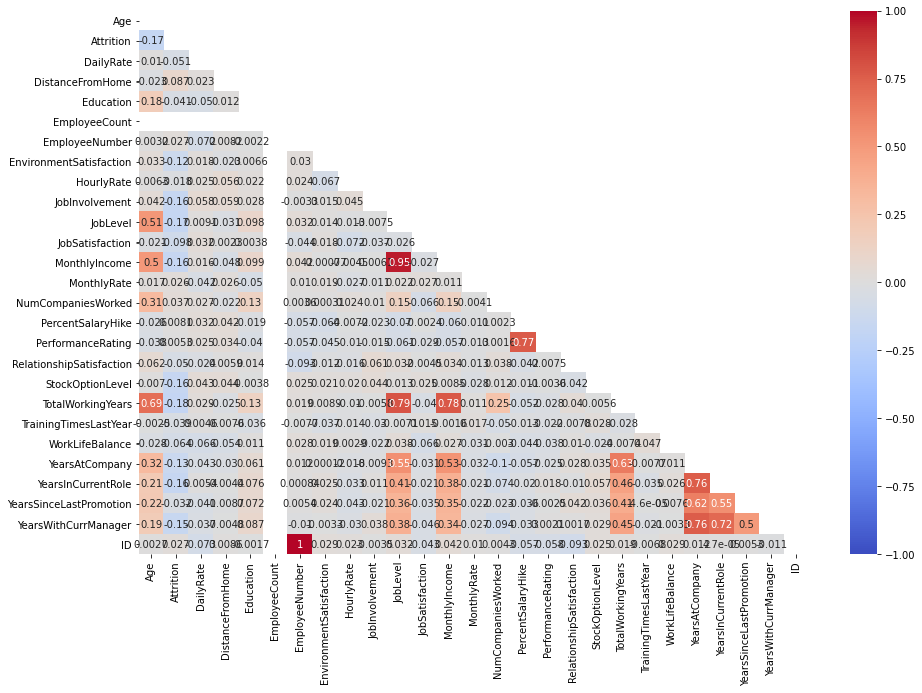

In [9]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

We can see that job level is highly correlated to monthly income hence we drop job level. We also drop EmployeeCount.


In [0]:
X = attrition_data.drop(['Attrition','ID','EmployeeNumber','JobLevel','EmployeeCount'], axis = 1)
y = attrition_data['Attrition']

In [0]:
ohcols=X.select_dtypes(include=['object'])

In [12]:
ohcols.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [0]:
OHX=pd.get_dummies(X,columns=ohcols.columns,drop_first=True)

In [0]:
Xtrain,Xtest,ytrain,ytest=train_test_split(OHX,y,test_size=0.3)

In [0]:
sc = StandardScaler() 
XtrainSc=sc.fit_transform(Xtrain)
XtestSc=sc.transform(Xtest)

In [0]:
def plotMetrics(models,Xtrain,ytrain,Xtest,ytest):
  for model in models:
    modelName=str(model)
    start = modelName.find( '(' )
    if start != -1:
      modelName = modelName[:start]    
    print('Model: ',str(modelName)+'\n')
    model.fit(Xtrain,ytrain)
    predictions = model.predict(Xtest)
    probs = model.predict_proba(Xtest)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(ytest, probs) 
    plt.plot(fper, tper)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    auc = roc_auc_score(ytest, probs)
    plt.title('ROC curve')
    plt.show()
    print('AUC: '+str(auc)+'\n')
    print('Accuracy: ',accuracy_score(ytest, predictions),'\n')
    print(classification_report(ytest, predictions))
    print('\n')

In [0]:
rf=RandomForestClassifier(class_weight='balanced')
xgb=XGBClassifier(class_weight='balanced')
svc=SVC(kernel='rbf',probability=True,class_weight='balanced')
models=[rf,xgb,svc]

Model:  RandomForestClassifier



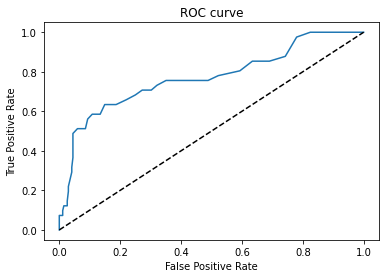

AUC: 0.7704768838733163

Accuracy:  0.8673139158576052 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       268
           1       0.50      0.07      0.13        41

    accuracy                           0.87       309
   macro avg       0.69      0.53      0.53       309
weighted avg       0.82      0.87      0.82       309



Model:  XGBClassifier



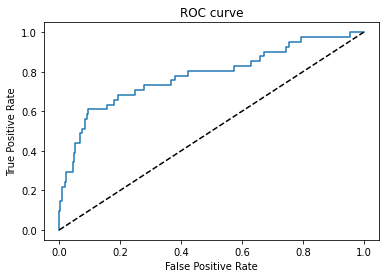

AUC: 0.7813978886057518

Accuracy:  0.8673139158576052 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       268
           1       0.50      0.29      0.37        41

    accuracy                           0.87       309
   macro avg       0.70      0.62      0.65       309
weighted avg       0.85      0.87      0.85       309



Model:  SVC



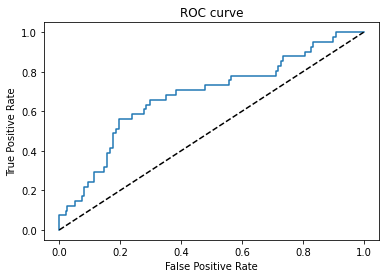

AUC: 0.67901346923917

Accuracy:  0.47896440129449835 

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       268
           1       0.17      0.76      0.28        41

    accuracy                           0.48       309
   macro avg       0.55      0.60      0.44       309
weighted avg       0.82      0.48      0.55       309





In [18]:
plotMetrics(models,Xtrain,ytrain,Xtest,ytest)

As we can see AUC score for XGBoost is highest.

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  